In [14]:
import gurobipy as gp
from gurobipy import GRB
import networkx as nx
from gerrychain import Graph
import geopandas as gpd
import math

The Kansas graph has 105 nodes
the Kansas graph has 263 edges
Kansas graph has nodes [0, 26, 61, 86, 1, 21, 39, 76, 88, 91, 2, 43, 54, 62, 73, 94, 96, 3, 14, 69, 71, 102, 4, 22, 46, 72, 78, 5, 19, 48, 59, 64, 100, 6, 16, 57, 60, 93, 7, 10, 25, 51, 75, 87, 98, 8, 34, 41, 56, 101, 103, 9, 11, 27, 42, 63, 84, 90, 40, 55, 85, 95, 12, 31, 36, 58, 77, 79, 80, 13, 44, 104, 15, 66, 67, 97, 28, 49, 82, 17, 30, 37, 52, 74, 18, 23, 38, 65, 81, 29, 20, 99, 24, 35, 68, 70, 53, 83, 92, 89, 32, 33, 45, 47, 50]
Kansas graph has edges [(0, 26), (0, 61), (0, 86), (26, 6), (26, 18), (26, 57), (26, 65), (61, 31), (61, 65), (86, 6), (86, 45), (86, 60), (1, 21), (1, 39), (1, 76), (1, 88), (1, 91), (21, 30), (21, 39), (21, 71), (21, 91), (21, 94), (39, 3), (39, 14), (39, 71), (39, 88), (76, 13), (76, 32), (76, 88), (76, 91), (88, 13), (88, 14), (88, 44), (88, 63), (91, 30), (91, 32), (91, 52), (2, 43), (2, 54), (2, 62), (2, 73), (2, 94), (2, 96), (43, 23), (43, 62), (43, 81), (43, 96), (54, 3), (54, 48), (54

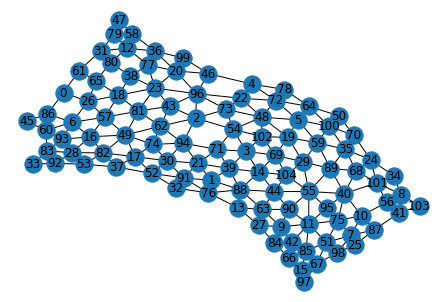

In [15]:
filepath = 'C:/Users/wharr/OneDrive/Desktop/OR project/'
filename = 'KS.graph.txt'

G = nx.read_edgelist(filepath + filename,nodetype=int)
print("The Kansas graph has",G.number_of_nodes(),"nodes")
print("the Kansas graph has",G.number_of_edges(),"edges")
print("Kansas graph has nodes",G.nodes )
print("Kansas graph has edges",G.edges )
nx.draw(G, with_labels=True)

In [16]:
# Read Kansas county graph from the json file
filepath = 'C:/Users/wharr/OneDrive/Desktop/OR project/'
filename = 'KS_counties.json'
G = Graph.from_json(filepath+filename)

In [17]:
for node in G.nodes:
    name = G.nodes[node]['NAME10']
    population = G.nodes[node]['TOTPOP']
    print("Node", node,"represents", name,"County and its population in 2010",population)

Node 0 represents Greeley County and its population in 2010 1247
Node 1 represents Franklin County and its population in 2010 25992
Node 2 represents Phillips County and its population in 2010 5642
Node 3 represents Jackson County and its population in 2010 13462
Node 4 represents Pawnee County and its population in 2010 6973
Node 5 represents Clay County and its population in 2010 8535
Node 6 represents Bourbon County and its population in 2010 15173
Node 7 represents Republic County and its population in 2010 4980
Node 8 represents Doniphan County and its population in 2010 7945
Node 9 represents Seward County and its population in 2010 22952
Node 10 represents Ford County and its population in 2010 33848
Node 11 represents Montgomery County and its population in 2010 35471
Node 12 represents Marshall County and its population in 2010 10117
Node 13 represents Woodson County and its population in 2010 3309
Node 14 represents Lincoln County and its population in 2010 3241
Node 15 repre

In [18]:
filepath = 'C:/Users/wharr/OneDrive/Desktop/OR Project/'
filename = 'KS_counties.shp'
df = gpd.read_file(filepath+filename)

In [19]:
# read the text file "KS.population" and store in the list called population
population = list()

# open the text file for reading
filepath = 'C:/Users/wharr/OneDrive/Desktop/OR project/'
filename = "KS.population"
file = open( filepath+filename ,"r")

# while the current line is not empty, read in a new county population
line = file.readline()

while line != "":
    # split the line into two "words": 
    #    word[0]: the county's number
    #    word[1]: the county's population
    words = line.split() 
    county_number = words[0]
    county_population = int(words[1]) # cast the string as type int
    
    # append to population list
    population.append(county_population)
    
    # read next line
    line = file.readline() 

file.close()
print("population = ",population)

population =  [32787, 6373, 12660, 6497, 24132, 9656, 110826, 2234, 5724, 2597, 3977, 2695, 16512, 3853, 6970, 2519, 177934, 71115, 8601, 4437, 2882, 6091, 498365, 6689, 4575, 1247, 25992, 5642, 13462, 6973, 8535, 15173, 4980, 7945, 22952, 33848, 35471, 10117, 3309, 3241, 36776, 2235, 2556, 2790, 28452, 157505, 36311, 21603, 64511, 7053, 1891, 2756, 5799, 10178, 29180, 3107, 7829, 16295, 21607, 3037, 76227, 9656, 5923, 5181, 4861, 8102, 2961, 6010, 6006, 27674, 2215, 55606, 7858, 34684, 34362, 4936, 3077, 9409, 6034, 39134, 13371, 33690, 21604, 16924, 5671, 7900, 544179, 2690, 3858, 1916, 3001, 9533, 9984, 19126, 19754, 1750, 65880, 2726, 1485, 3669, 2553, 4256, 10083, 3233, 3307]


In [20]:
deviation = 0.01

k = 4          # number of districts
total_population = sum(G.nodes[node]['TOTPOP'] for node in G.nodes)

L = math.ceil((1-deviation/2)*total_population/k)
U = math.floor((1+deviation/2)*total_population/k)

In [21]:
# create model 
m = gp.Model()

# create variables
x = m.addVars(G.nodes, k, vtype=GRB.BINARY) # x[i,j] equals one when county i is assigned to district j
y = m.addVars(G.edges, vtype=GRB.BINARY)  # y[u,v] equals one when edge {u,v} is cut

Restricted license - for non-production use only - expires 2022-01-13


In [22]:
# objective is to minimize the total perimeter of the districts
#  the boundary length between counties u and v is stored in G.edges[u,v]['shared_perim']
m.setObjective( gp.quicksum( G.edges[u,v]['shared_perim']*y[u,v] for u,v in G.edges ), GRB.MINIMIZE )
# add constraints saying that each county i is assigned to one district
m.addConstrs( gp.quicksum(x[i,j] for j in range(k)) == 1 for i in G.nodes)
# add constraints saying that each district has population at least L and at most U
m.addConstrs( gp.quicksum( G.nodes[i]['TOTPOP'] * x[i,j] for i in G.nodes) >= L for j in range(k) )
m.addConstrs( gp.quicksum( G.nodes[i]['TOTPOP'] * x[i,j] for i in G.nodes) <= U for j in range(k) )
# add constraints saying that edge {i,j} is cut if i is assigned to district v but j is not.
m.addConstrs( x[i,v] - x[j,v] <= y[i,j] for i,j in G.edges for v in range(k))
m.update()

In [12]:
# Add root variables: r[i,j] equals 1 if node i is the "root" of district j
r = m.addVars(G.nodes, k, vtype=GRB.BINARY)
# Add flow variables: f[u,v] = amount of flow sent across arc uv 
#  Flows are sent across arcs of the directed version of G which we call DG
DG = nx.DiGraph(G) # directed version of G
f = m.addVars(DG.edges, vtype=GRB.CONTINUOUS)

In [13]:
M = G.number_of_nodes() - k + 1
# Each district j should have one root
m.addConstrs( gp.quicksum( r[i,j] for i in DG.nodes) == 1 for j in range(k) )
# If node i is not assigned to district j, then it cannot be its root
m.addConstrs( r[i,j] <= x[i,j] for i in DG.nodes for j in range(k) )  
# if not a root, consume some flow.
# if a root, only send out (so much) flow.
m.addConstrs( gp.quicksum( f[u,v] - f[v,u] for u in DG.neighbors(v) ) >= 1 - M * gp.quicksum( r[v,j] for j in range(k)) for v in G.nodes)
# do not send flow across cut edges
m.addConstrs( f[i,j] + f[j,i] <= M * (1 - y[i,j]) for (i,j) in G.edges )
m.update()

In [14]:
m.optimize()

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1957 rows, 1629 columns and 7937 nonzeros
Model fingerprint: 0x18259810
Variable types: 526 continuous, 1103 integer (1103 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+05]
  Objective range  [4e-03, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve time: 0.07s
Presolved: 1957 rows, 1629 columns, 7937 nonzeros
Variable types: 526 continuous, 1103 integer (1103 binary)

Root relaxation: objective 0.000000e+00, 728 iterations, 0.11 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0  436          -    0.00000      -     -    0s
     0     0    0.13495    0  446          -    0.13495      -     -    1s
     0     0    1.02004    0  437          -    1.0

 57420 46888   11.27002   40  359          -    5.84020      -   110  609s
 58622 47555 infeasible   86               -    5.84306      -   110  618s
 59437 48621   12.18662   39  323          -    5.86171      -   110  627s
 60773 49451   10.10368   35  324          -    5.86706      -   110  636s
 61864 50325 infeasible   81               -    5.87129      -   110  645s
 62872 51502    7.45889   32  307          -    5.87692      -   110  654s
 64352 52527 infeasible  112               -    5.89218      -   110  662s
 65570 53266   18.66218   61  197          -    5.91645      -   110  671s
 66465 54274   12.57847   48  138          -    5.92872      -   110  680s
 67771 55121   13.59992   60  103          -    5.93134      -   110  690s
 68904 56045   19.05152   79  200          -    5.97034      -   111  699s
 70014 57119    8.66897   23  178          -    5.97034      -   111  708s
 71284 58091   15.94743   56  264          -    5.99057      -   111  717s
 72492 59046   11.15456  

 189467 151328 infeasible   75               -    6.58755      -   111 1634s
 190386 152194   16.45773   41  278          -    6.59429      -   111 1643s
 191540 153399   22.20097   87   88          -    6.59627      -   112 1649s
 193073 154200   12.64197   55   91          -    6.59785      -   111 1657s
 194074 154969   12.05306   57  298          -    6.60852      -   111 1666s
 194988 155721    9.14777   32  434          -    6.60906      -   111 1674s
 196097 156540   15.34836   45  216          -    6.61017      -   111 1683s
 197070 157537 infeasible   76               -    6.61383      -   111 1691s
 198351 158294   12.10965   37  312          -    6.61383      -   111 1700s
 199340 159334   21.11968   65  239          -    6.61383      -   111 1710s
 200674 160458   27.03177  108   78          -    6.62767      -   111 1718s
 201979 161427   19.21495   67  220          -    6.63378      -   111 1727s
 203236 162288   11.03106   38  287          -    6.63468      -   111 1735s

 317901 253440   18.79327   83   61          -    6.88635      -   110 2511s
 319228 254548   18.48990   72   80          -    6.89028      -   110 2515s
 321604 256229   21.73508   84  141          -    6.89464      -   110 2523s
 322740 257249   13.92271   63   74          -    6.89573      -   110 2527s
 323961 258281    9.93878   41  142          -    6.89573      -   110 2531s
 326233 260191    9.96723   31  410          -    6.90353      -   110 2538s
 327560 261016   18.04582   53  281          -    6.90362      -   110 2542s
 328693 261736    9.64630   31  413          -    6.90870      -   110 2546s
 329583 263232    9.08817   24  374          -    6.90872      -   110 2552s
 331380 264307 infeasible   75               -    6.91492      -   110 2556s
 332751 264898   17.31170   64  262          -    6.91706      -   110 2560s
 334822 267005   11.49472   38  357          -    6.92231      -   110 2568s
 336064 268291    8.66972   35  145          -    6.92526      -   110 2572s

 486876 386723   16.21884   72   91          -    7.11187      -   109 3045s
 488983 388653   13.28799   50   83          -    7.11527      -   109 3052s
 490162 389686   10.59065   39  252          -    7.11554      -   109 3056s
 491494 390485   10.75189   42   81          -    7.11703      -   109 3061s
 493796 392621   15.21957   55  112          -    7.11897      -   109 3068s
 495128 393652   12.80200   38  356          -    7.11979      -   109 3073s
 496417 394424    8.40939   32  363          -    7.12144      -   109 3077s
 497461 395446   16.80706   54  127          -    7.12319      -   109 3081s
 498757 396397   11.21225   41  228          -    7.12319      -   109 3085s
 499852 397526   19.59309   82  224          -    7.12667      -   109 3090s
 502954 399533    8.79556   28  434          -    7.12881      -   109 3097s
 503874 400504   14.46572   39  241          -    7.12881      -   109 3101s
 505011 401408   20.13074   79  192          -    7.12958      -   109 3105s

 649397 515296   21.07725   95   87          -    7.25198      -   108 3582s
 650443 516425 infeasible   74               -    7.25278      -   108 3586s
 651905 517400   18.60715   81   67          -    7.25410      -   108 3590s
 653162 518350   15.30984   50  159          -    7.25481      -   108 3595s
 654313 519222   14.25722   57   55          -    7.25492      -   108 3600s
 656817 521008   15.24927   45  134          -    7.25738      -   108 3609s
 657722 522119   12.52162   45  232          -    7.25738      -   108 3613s
 659066 523132   19.62076   90   98          -    7.25762      -   108 3617s
 660464 523951    7.40527   38  177          -    7.25966      -   108 3621s
 661460 525232   13.82866   83   44          -    7.25971      -   108 3626s
 663156 526255   16.44045   61  116          -    7.25994      -   108 3631s
 664562 526962 infeasible   98               -    7.26175      -   108 3635s
 666910 529002   12.75820   39  362          -    7.26466      -   108 3643s

 803079 636246   18.02404  122  127          -    7.35535      -   108 4120s
 805319 637132 infeasible  131               -    7.35625      -   108 4125s
 806615 638605   10.38609   45  140          -    7.35789      -   108 4132s
 807743 639552   12.11370   46  208          -    7.35866      -   108 4137s
 808989 640374 infeasible   85               -    7.35884      -   108 4141s
 809984 641565   13.36441   46  340          -    7.35915      -   108 4145s
 811887 642375 infeasible  166               -    7.36181      -   108 4150s
 813933 644389   10.38473   39  345          -    7.36256      -   108 4158s
 815178 645078   21.86950   97   83          -    7.36278      -   108 4163s
 816079 646014   10.85796   40  262          -    7.36278      -   108 4167s
 817260 646702    8.46310   27  481          -    7.36386      -   108 4171s
 818130 647772   16.04206   70  148          -    7.36471      -   108 4175s
 819463 648779   17.26087   49   54          -    7.36642      -   108 4180s

 925768 111412    9.41174   43  143   10.57214    7.60113  28.1%   108 4807s
 926915 111773   10.41999   44  312   10.57214    7.60421  28.1%   108 4813s
 928217 112164   10.34195   39  453   10.57214    7.60806  28.0%   108 4819s
 929363 112619   10.41865   35  452   10.57214    7.61165  28.0%   108 4824s
 930731 112956    9.12990   29  329   10.57214    7.61576  28.0%   108 4831s
 931898 113353   10.11981   33  234   10.57214    7.61875  27.9%   108 4837s
 933184 113794    9.94524   33  220   10.57214    7.62142  27.9%   108 4842s
 934333 114312     cutoff   45        10.57214    7.62536  27.9%   108 4849s
 935654 114794   10.45278   31  285   10.57214    7.62825  27.8%   108 4854s
 936957 115048    9.29240   31  413   10.57214    7.63259  27.8%   108 4859s
 937625 115617   10.23387   37  121   10.57214    7.63377  27.8%   108 4866s
 939343 115978     cutoff   37        10.57214    7.63805  27.8%   108 4871s
 940463 116264   10.24464   58  173   10.57214    7.64126  27.7%   108 4878s

 1049204 148290   10.48988   36  213   10.57214    7.87646  25.5%   109 5427s
 1050310 148733    9.43942   32  350   10.57214    7.87911  25.5%   109 5432s
 1051617 149118    9.34468   30  414   10.57214    7.88142  25.5%   109 5438s
 1052862 149471    8.10555   32  226   10.57214    7.88352  25.4%   109 5444s
 1053927 149795     cutoff   37        10.57214    7.88486  25.4%   109 5449s
 1055153 150089     cutoff   48        10.57214    7.88689  25.4%   109 5455s
 1056245 150436    9.64289   31  240   10.57214    7.88882  25.4%   109 5460s
 1057516 150746     cutoff   43        10.57214    7.89178  25.4%   109 5466s
 1058721 151129   10.19340   35  183   10.57214    7.89359  25.3%   109 5471s
 1059924 151482     cutoff   34        10.57214    7.89633  25.3%   109 5477s
 1061191 151869    8.56464   34  195   10.57214    7.89850  25.3%   109 5482s
 1062548 152257    8.70969   28  352   10.57214    7.90101  25.3%   109 5487s
 1063874 152419   10.39764   38  156   10.57214    7.90346  25.2

 1175475 175211    8.82740   24  431   10.46886    8.08637  22.8%   110 5989s
 1176657 175583    9.22457   32  419   10.46886    8.08791  22.7%   110 5994s
 1177963 175831    9.09191   37  231   10.46886    8.09012  22.7%   110 5999s
 1179087 176084    9.77017   31  299   10.46886    8.09211  22.7%   110 6004s
 1180387 176470    9.41422   38  271   10.46886    8.09404  22.7%   110 6009s
 1181755 176748    9.89829   31  420   10.46886    8.09563  22.7%   110 6014s
 1182978 177020     cutoff   33        10.46886    8.09785  22.6%   110 6019s
 1184250 177279     cutoff   34        10.46886    8.09902  22.6%   110 6025s
 1185375 177541   10.39210   46  348   10.46886    8.10076  22.6%   110 6030s
 1187637 178064    9.66324   43  150   10.46886    8.10373  22.6%   110 6039s
 1188899 178421     cutoff   39        10.46886    8.10569  22.6%   110 6044s
 1190241 178687    9.97235   31  362   10.46886    8.10737  22.6%   110 6049s
 1191576 178934    9.87091   35  146   10.46886    8.10906  22.5

 1305329 204010     cutoff   39        10.46886    8.25841  21.1%   110 6537s
 1306581 204245     cutoff   34        10.46886    8.25984  21.1%   110 6541s
 1307705 204449   10.26531   35  246   10.46886    8.26104  21.1%   110 6546s
 1308811 204683    9.21782   38  191   10.46886    8.26226  21.1%   110 6551s
 1309727 204931     cutoff   45        10.46886    8.26333  21.1%   110 6556s
 1310965 205185   10.10901   37  245   10.46886    8.26459  21.1%   110 6561s
 1312152 205401 infeasible   36        10.46886    8.26598  21.0%   110 6566s
 1313387 205741    8.87937   38  414   10.46886    8.26714  21.0%   110 6571s
 1314774 206019     cutoff   36        10.46886    8.26909  21.0%   110 6576s
 1316033 206243    9.59795   33  356   10.46886    8.27063  21.0%   110 6581s
 1317276 206540    9.42891   39  132   10.46886    8.27253  21.0%   110 6585s
 1319590 207012    9.72247   37  177   10.46886    8.27546  21.0%   110 6595s
 1322349 207557   10.25972   33  320   10.46886    8.27852  20.9

 1443457 231692   10.42159   37  295   10.46886    8.41062  19.7%   109 7075s
 1444641 231907     cutoff   51        10.46886    8.41180  19.6%   109 7080s
 1445984 232108    9.50892   39  314   10.46886    8.41304  19.6%   109 7085s
 1447012 232368    9.18699   32  181   10.46886    8.41403  19.6%   109 7091s
 1448405 232600   10.45176   43  238   10.46886    8.41488  19.6%   109 7096s
 1449660 232780   10.02314   30  404   10.46886    8.41633  19.6%   109 7101s
 1450973 232975   10.24989   36  182   10.46886    8.41796  19.6%   109 7105s
 1452335 233304    9.62007   40  178   10.46886    8.41884  19.6%   109 7110s
 1453915 233529   10.04732   44   93   10.46886    8.42027  19.6%   109 7115s
 1456172 234000    9.79280   34  177   10.46886    8.42299  19.5%   109 7124s
 1457590 234230   10.08549   35  311   10.46886    8.42427  19.5%   109 7129s
 1458856 234469   10.34633   37  182   10.46886    8.42538  19.5%   109 7134s
 1460073 234680    9.07155   31  435   10.46886    8.42648  19.5

 1586134 257717     cutoff   30        10.46886    8.54234  18.4%   108 7608s
 1587401 257929    9.89826   37  416   10.46886    8.54337  18.4%   108 7613s
 1588559 258139     cutoff   39        10.46886    8.54421  18.4%   108 7618s
 1589768 258262    9.94753   42  214   10.46886    8.54511  18.4%   108 7623s
 1590906 258553   10.32525   43  249   10.46886    8.54609  18.4%   108 7628s
 1592300 258772    9.80734   46   74   10.46886    8.54740  18.4%   108 7633s
 1593533 258995    9.35127   31  345   10.46886    8.54832  18.3%   108 7640s
 1594685 259243    8.69821   36  251   10.46886    8.54885  18.3%   108 7645s
 1595959 259477     cutoff   40        10.46886    8.55000  18.3%   108 7650s
 1597685 259697    9.19029   31  334   10.46886    8.55124  18.3%   108 7655s
 1599773 260226   10.09849   42  324   10.46886    8.55301  18.3%   108 7664s
 1601192 260452    8.65780   45  138   10.46886    8.55450  18.3%   108 7669s
 1602552 260679   10.00210   41  109   10.46886    8.55547  18.3

 1729588 281576     cutoff   41        10.46886    8.65439  17.3%   107 8137s
 1730914 281781    9.91883   43  108   10.46886    8.65534  17.3%   107 8141s
 1732103 281950   10.19419   34  321   10.46886    8.65621  17.3%   107 8145s
 1734580 282319    9.03302   39  270   10.46886    8.65819  17.3%   107 8153s
 1735642 282499     cutoff   40        10.46886    8.65882  17.3%   107 8157s
 1736930 282686    9.96120   57   36   10.46886    8.65996  17.3%   107 8163s
 1738063 282888     cutoff   46        10.46886    8.66086  17.3%   107 8167s
 1739399 283044     cutoff   32        10.46886    8.66180  17.3%   107 8172s
 1740619 283268    9.98291   51  257   10.46886    8.66275  17.3%   107 8176s
 1742001 283424    9.24012   34  313   10.46886    8.66364  17.2%   107 8181s
 1743295 283598   10.39201   36  377   10.46886    8.66449  17.2%   107 8185s
 1745769 283973     cutoff   51        10.46886    8.66651  17.2%   107 8194s
 1746384 283973   10.12978   52  184   10.46886    8.66667  17.2

 1878696 303699   10.38845   45  304   10.46886    8.75913  16.3%   106 8663s
 1880058 303866    9.95900   36  328   10.46886    8.75999  16.3%   106 8669s
 1881128 304044   10.35207   32  294   10.46886    8.76073  16.3%   106 8673s
 1882432 304244    9.80934   37  201   10.46886    8.76163  16.3%   106 8677s
 1883786 304425    9.74351   34  357   10.46886    8.76254  16.3%   106 8682s
 1885214 304590     cutoff   41        10.46886    8.76316  16.3%   106 8686s
 1886542 304773   10.32958   35  422   10.46886    8.76401  16.3%   106 8691s
 1887888 304990    9.61039   39  235   10.46886    8.76484  16.3%   106 8695s
 1888951 305134   10.14396   28  230   10.46886    8.76547  16.3%   106 8700s
 1890321 305293     cutoff   40        10.46886    8.76650  16.3%   106 8705s
 1892903 305655     cutoff   34        10.46886    8.76849  16.2%   106 8714s
 1894065 305845    9.88016   31  334   10.46886    8.76913  16.2%   106 8719s
 1895518 306091     cutoff   33        10.46886    8.76998  16.2

 2029177 323169    9.38080   45  312   10.46886    8.85039  15.5%   105 9202s
 2030597 323409    9.96737   31  212   10.46886    8.85142  15.4%   105 9207s
 2032084 323560    9.31956   44  111   10.46886    8.85229  15.4%   105 9212s
 2033379 323711    9.59258   34  197   10.46886    8.85299  15.4%   105 9217s
 2034733 323907   10.45694   45  115   10.46886    8.85348  15.4%   105 9221s
 2036053 324056    9.64207   34  242   10.46886    8.85471  15.4%   105 9226s
 2037228 324216    9.52051   45   75   10.46886    8.85517  15.4%   105 9230s
 2040036 324595   10.33493   32  168   10.46886    8.85671  15.4%   105 9239s
 2041332 324746    9.00291   34  224   10.46886    8.85754  15.4%   105 9243s
 2042599 324888     cutoff   42        10.46886    8.85823  15.4%   105 9248s
 2043757 325024    9.32695   39  152   10.46886    8.85877  15.4%   105 9252s
 2045139 325176    9.53742   29  393   10.46886    8.85966  15.4%   105 9257s
 2046506 325323     cutoff   35        10.46886    8.86053  15.4

 2188645 342257   10.42518   47  310   10.46886    8.93796  14.6%   104 9731s
 2190015 342411    9.81926   42  224   10.46886    8.93885  14.6%   104 9735s
 2193008 342780   10.37949   36  192   10.46886    8.94009  14.6%   104 9743s
 2194283 342881   10.14313   42  321   10.46886    8.94080  14.6%   104 9748s
 2195385 342997     cutoff   30        10.46886    8.94112  14.6%   104 9753s
 2196765 343151   10.21020   36  385   10.46886    8.94229  14.6%   104 9757s
 2198098 343238   10.41771   48  139   10.46886    8.94298  14.6%   104 9762s
 2199430 343367     cutoff   41        10.46886    8.94382  14.6%   104 9766s
 2200741 343495   10.25555   42  150   10.46886    8.94454  14.6%   104 9770s
 2203540 343782   10.28199   35  193   10.46886    8.94591  14.5%   104 9778s
 2204776 343939   10.22105   33  371   10.46886    8.94653  14.5%   104 9783s
 2206182 344091     cutoff   45        10.46886    8.94728  14.5%   104 9787s
 2207610 344208    9.75495   29  313   10.46886    8.94791  14.5

 2351917 358179    9.85131   35  309   10.46886    9.02041  13.8%   103 10256s
 2353183 358272   10.28648   33  332   10.46886    9.02093  13.8%   103 10260s
 2355873 358468   10.10615   39  159   10.46886    9.02236  13.8%   103 10268s
 2357069 358540    9.79186   46   85   10.46886    9.02274  13.8%   103 10273s
 2358519 358635     cutoff   45        10.46886    9.02343  13.8%   103 10277s
 2359900 358756   10.01127   25  342   10.46886    9.02422  13.8%   103 10281s
 2361299 358891   10.05940   35  290   10.46886    9.02498  13.8%   103 10285s
 2362752 359011    9.70695   40  355   10.46886    9.02565  13.8%   103 10290s
 2363973 359190    9.87863   44  253   10.46886    9.02615  13.8%   103 10295s
 2365694 359343     cutoff   36        10.46886    9.02704  13.8%   103 10301s
 2366913 359488    9.91780   40  262   10.46886    9.02766  13.8%   103 10305s
 2368445 359652     cutoff   30        10.46886    9.02828  13.8%   103 10310s
 2369940 359798     cutoff   46        10.46886    9

 2518178 372380     cutoff   49        10.46886    9.09682  13.1%   102 10783s
 2519502 372457   10.18157   36  453   10.46886    9.09736  13.1%   102 10787s
 2520629 372604   10.14088   35  267   10.46886    9.09792  13.1%   102 10792s
 2522209 372731    9.59870   48   97   10.46886    9.09865  13.1%   102 10797s
 2523761 372801   10.28026   51  233   10.46886    9.09930  13.1%   102 10802s
 2525065 372935   10.17251   35  354   10.46886    9.09971  13.1%   102 10807s
 2526468 373019     cutoff   38        10.46886    9.10033  13.1%   102 10811s
 2527772 373096     cutoff   40        10.46886    9.10103  13.1%   102 10815s
 2529349 373169     cutoff   32        10.46886    9.10174  13.1%   102 10820s
 2532255 373340    9.77262   34  219   10.46886    9.10308  13.0%   102 10829s
 2533379 373385     cutoff   40        10.46886    9.10364  13.0%   102 10834s
 2534364 373499    9.51784   33  427   10.46886    9.10401  13.0%   102 10838s
 2535738 373524     cutoff   34        10.46886    9

 2681638 382472   10.34060   47  142   10.46886    9.16697  12.4%   101 11312s
 2683016 382567   10.13863   50   83   10.46886    9.16755  12.4%   101 11316s
 2684475 382608     cutoff   54        10.46886    9.16810  12.4%   101 11321s
 2685808 382705   10.20173   37  333   10.46886    9.16862  12.4%   101 11326s
 2687310 382746   10.18820   38  270   10.46886    9.16919  12.4%   101 11331s
 2688644 382845     cutoff   40        10.46886    9.16971  12.4%   101 11336s
 2690101 382886   10.22192   33  236   10.46886    9.17036  12.4%   101 11341s
 2691192 382925     cutoff   42        10.46886    9.17078  12.4%   101 11346s
 2692262 382989    9.39887   40  280   10.46886    9.17140  12.4%   101 11350s
 2693866 383056    9.79117   45  131   10.46886    9.17203  12.4%   101 11356s
 2695422 383155    9.46466   29  209   10.46886    9.17282  12.4%   101 11360s
 2698103 383285    9.69523   32  156   10.46886    9.17398  12.4%   101 11369s
 2699422 383342   10.42161   35  283   10.46886    9

 2847808 390272   10.39524   41  294   10.46886    9.23328  11.8%   101 11833s
 2849326 390327   10.08022   50  244   10.46886    9.23390  11.8%   101 11838s
 2850856 390392   10.05076   53  252   10.46886    9.23455  11.8%   101 11843s
 2852081 390435     cutoff   33        10.46886    9.23473  11.8%   101 11847s
 2853526 390489   10.14952   31  252   10.46886    9.23554  11.8%   101 11851s
 2854979 390507   10.10494   42  152   10.46886    9.23606  11.8%   101 11855s
 2857830 390592    9.68323   37  358   10.46886    9.23715  11.8%   100 11863s
 2859029 390663    9.74066   41  166   10.46886    9.23763  11.8%   100 11867s
 2860440 390705     cutoff   45        10.46886    9.23807  11.8%   100 11872s
 2862077 390731     cutoff   42        10.46886    9.23891  11.7%   100 11876s
 2863404 390794     cutoff   47        10.46886    9.23947  11.7%   100 11881s
 2864985 390834     cutoff   43        10.46886    9.24012  11.7%   100 11885s
 2866217 390892     cutoff   44        10.46886    9

 3014777 395141   10.04168   46  215   10.46886    9.29633  11.2%   100 12352s
 3016193 395126     cutoff   42        10.46886    9.29675  11.2%   100 12357s
 3017108 395128   10.40007   46  234   10.46886    9.29715  11.2%   100 12361s
 3018655 395178     cutoff   49        10.46886    9.29780  11.2%   100 12365s
 3020100 395224    9.67282   36  270   10.46886    9.29833  11.2%   100 12370s
 3022461 395237 infeasible   50        10.46886    9.29924  11.2%   100 12375s
 3023974 395273   10.42826   38  299   10.46886    9.29986  11.2%   100 12383s
 3025514 395262    9.84486   48  132   10.46886    9.30043  11.2%   100 12387s
 3026924 395306   10.28452   38  176   10.46886    9.30103  11.2%   100 12392s
 3028277 395292     cutoff   36        10.46886    9.30154  11.2%   100 12397s
 3030110 395319   10.11484   34  464   10.46886    9.30225  11.1%   100 12401s
 3031538 395328   10.20051   34  339   10.46886    9.30275  11.1%   100 12405s
 3034412 395417   10.44914   41  180   10.46886    9

 3182512 396619     cutoff   49        10.46886    9.35814  10.6%  98.9 12887s
 3184143 396653     cutoff   39        10.46886    9.35876  10.6%  98.9 12891s
 3185658 396643    9.52280   45  233   10.46886    9.35927  10.6%  98.9 12896s
 3187265 396657   10.44466   52  262   10.46886    9.35970  10.6%  98.9 12900s
 3190111 396634   10.06206   50   57   10.46886    9.36090  10.6%  98.9 12909s
 3191629 396636   10.36924   41  318   10.46886    9.36141  10.6%  98.9 12913s
 3193070 396648     cutoff   50        10.46886    9.36193  10.6%  98.9 12917s
 3194620 396653   10.27229   46  346   10.46886    9.36248  10.6%  98.9 12922s
 3195922 396673   10.29516   39  164   10.46886    9.36293  10.6%  98.9 12927s
 3197911 396684    9.95777   35  250   10.46886    9.36364  10.6%  98.9 12934s
 3198729 396696     cutoff   49        10.46886    9.36377  10.6%  98.9 12939s
 3200411 396692    9.80252   40  339   10.46886    9.36442  10.5%  98.8 12943s
 3201983 396705    9.79885   36  178   10.46886    9

 3355477 394995    9.92713   30  376   10.46886    9.41766  10.0%  98.1 13412s
 3356965 394978    9.98915   51  270   10.46886    9.41809  10.0%  98.1 13416s
 3358212 394994   10.42333   47  251   10.46886    9.41843  10.0%  98.1 13421s
 3359671 394955   10.17863   51  311   10.46886    9.41900  10.0%  98.1 13425s
 3362901 394931     cutoff   33        10.46886    9.41998  10.0%  98.1 13433s
 3364332 394842   10.09598   42  290   10.46886    9.42053  10.0%  98.1 13438s
 3365878 394810   10.32353   34  232   10.46886    9.42109  10.0%  98.1 13442s
 3367322 394738     cutoff   49        10.46886    9.42149  10.0%  98.1 13446s
 3368889 394714     cutoff   42        10.46886    9.42208  10.0%  98.1 13451s
 3370245 394683     cutoff   45        10.46886    9.42255  10.0%  98.1 13455s
 3371843 394680    9.89450   46  237   10.46886    9.42301  10.0%  98.0 13460s
 3373527 394639   10.14018   40  248   10.46886    9.42367  10.0%  98.0 13466s
 3375327 394614    9.56287   42  242   10.46886    9

 3536123 389898   10.29595   38  289   10.46886    9.47822  9.46%  97.3 13934s
 3537729 389867   10.19808   44  304   10.46886    9.47882  9.46%  97.3 13938s
 3539343 389812   10.20962   42  217   10.46886    9.47928  9.45%  97.3 13942s
 3540890 389774   10.18012   44  239   10.46886    9.47982  9.45%  97.3 13947s
 3542439 389698   10.23708   59  208   10.46886    9.48027  9.44%  97.3 13952s
 3543905 389612    9.63915   33   97   10.46886    9.48060  9.44%  97.3 13956s
 3545423 389533     cutoff   48        10.46886    9.48123  9.43%  97.3 13960s
 3548594 389353     cutoff   55        10.46886    9.48233  9.42%  97.3 13968s
 3550183 389312   10.39771   44  141   10.46886    9.48284  9.42%  97.3 13973s
 3551730 389271    9.84653   39  191   10.46886    9.48338  9.41%  97.2 13978s
 3552999 389195     cutoff   38        10.46886    9.48381  9.41%  97.2 13982s
 3554436 389124   10.25373   45   88   10.46886    9.48434  9.40%  97.2 13987s
 3556062 389043   10.21710   36  315   10.46886    9

 3716316 379669     cutoff   41        10.46886    9.53843  8.89%  96.6 14450s
 3717844 379564     cutoff   39        10.46886    9.53895  8.88%  96.6 14455s
 3721191 379382   10.45160   51   56   10.46886    9.54002  8.87%  96.5 14464s
 3722955 379265     cutoff   34        10.46886    9.54052  8.87%  96.5 14469s
 3724463 379150   10.28196   35  296   10.46886    9.54100  8.86%  96.5 14474s
 3726159 379071     cutoff   51        10.46886    9.54150  8.86%  96.5 14479s
 3727162 378969     cutoff   55        10.46886    9.54189  8.85%  96.5 14483s
 3728926 378833     cutoff   47        10.46886    9.54244  8.85%  96.5 14488s
 3730536 378757     cutoff   41        10.46886    9.54291  8.84%  96.5 14492s
 3732024 378660    9.65057   39  329   10.46886    9.54338  8.84%  96.5 14496s
 3733554 378537   10.18141   41  311   10.46886    9.54402  8.83%  96.5 14501s
 3735096 378427     cutoff   40        10.46886    9.54458  8.83%  96.5 14506s
 3736915 378321   10.28152   32  379   10.46886    9

 3899345 364945   10.12059   54  184   10.46886    9.59779  8.32%  95.8 14978s
 3901144 364862   10.32337   41  351   10.46886    9.59843  8.31%  95.8 14983s
 3902776 364758    9.75976   49  131   10.46886    9.59874  8.31%  95.8 14988s
 3904195 364525   10.32249   42   98   10.46886    9.59929  8.31%  95.8 14992s
 3905849 364350   10.39878   47  195   10.46886    9.59985  8.30%  95.8 14997s
 3907578 364180     cutoff   43        10.46886    9.60043  8.30%  95.8 15001s
 3909374 364000     cutoff   39        10.46886    9.60102  8.29%  95.8 15006s
 3911144 363852     cutoff   32        10.46886    9.60160  8.28%  95.8 15010s
 3912802 363755     cutoff   44        10.46886    9.60210  8.28%  95.8 15015s
 3915259 363380     cutoff   36        10.46886    9.60297  8.27%  95.8 15024s
 3916993 363220   10.45211   34  423   10.46886    9.60357  8.27%  95.8 15029s
 3918768 363096     cutoff   42        10.46886    9.60408  8.26%  95.8 15034s
 3920355 362958   10.26821   48   75   10.46886    9

 4082999 344526     cutoff   46        10.46886    9.65838  7.74%  95.2 15505s
 4084758 344280     cutoff   44        10.46886    9.65898  7.74%  95.1 15510s
 4086606 344067   10.45558   46  197   10.46886    9.65965  7.73%  95.1 15515s
 4088212 343857    9.93042   37  191   10.46886    9.66013  7.73%  95.1 15520s
 4089796 343621   10.41087   40  329   10.46886    9.66057  7.72%  95.1 15525s
 4093345 343160     cutoff   46        10.46886    9.66191  7.71%  95.1 15534s
 4095102 342932    9.97666   53  216   10.46886    9.66244  7.70%  95.1 15538s
 4096756 342717     cutoff   47        10.46886    9.66303  7.70%  95.1 15543s
 4098472 342506   10.18130   42  341   10.46886    9.66359  7.69%  95.1 15547s
 4100194 342303     cutoff   40        10.46886    9.66427  7.69%  95.1 15552s
 4101871 342069   10.45495   44  243   10.46886    9.66484  7.68%  95.1 15557s
 4103524 341828   10.46166   35  466   10.46886    9.66538  7.67%  95.1 15561s
 4105286 341611     cutoff   43        10.46886    9

 4275568 316544     cutoff   48        10.46886    9.72384  7.12%  94.5 16039s
 4277252 316260     cutoff   52        10.46886    9.72439  7.11%  94.4 16044s
 4279104 315991     cutoff   41        10.46886    9.72502  7.11%  94.4 16049s
 4280805 315672     cutoff   41        10.46886    9.72563  7.10%  94.4 16053s
 4282771 315354   10.31264   39  210   10.46886    9.72638  7.09%  94.4 16059s
 4284562 315084     cutoff   41        10.46886    9.72687  7.09%  94.4 16063s
 4286255 314746     cutoff   49        10.46886    9.72753  7.08%  94.4 16068s
 4288048 314460   10.04776   51  204   10.46886    9.72813  7.08%  94.4 16073s
 4289764 314134 infeasible   38        10.46886    9.72879  7.07%  94.4 16078s
 4291608 313819   10.14053   39   81   10.46886    9.72941  7.06%  94.4 16082s
 4293316 313479     cutoff   34        10.46886    9.72995  7.06%  94.4 16087s
 4294922 313209   10.02717   42  301   10.46886    9.73052  7.05%  94.4 16092s
 4296590 312981   10.34968   48  110   10.46886    9

 4460365 281931   10.27639   39  155   10.46886    9.78963  6.49%  93.8 16546s
 4461980 281586   10.46840   41  166   10.46886    9.79035  6.48%  93.8 16550s
 4463770 281202     cutoff   38        10.46886    9.79093  6.48%  93.7 16555s
 4465515 280845     cutoff   38        10.46886    9.79169  6.47%  93.7 16560s
 4467184 280469   10.21779   39  315   10.46886    9.79233  6.46%  93.7 16565s
 4469160 280171    9.90350   48  139   10.46886    9.79307  6.46%  93.7 16570s
 4470754 279757   10.35645   33  331   10.46886    9.79362  6.45%  93.7 16575s
 4474431 278926     cutoff   41        10.46886    9.79499  6.44%  93.7 16584s
 4476268 278564     cutoff   40        10.46886    9.79562  6.43%  93.7 16589s
 4477951 278208   10.25143   39  242   10.46886    9.79632  6.42%  93.7 16593s
 4479487 277890   10.21126   43  268   10.46886    9.79683  6.42%  93.7 16597s
 4481060 277490     cutoff   49        10.46886    9.79758  6.41%  93.7 16602s
 4482711 277109     cutoff   42        10.46886    9

 4779977 198359     cutoff   48        10.46886    9.92206  5.22%  92.6 17066s
 4783720 197235   10.42427   48  262   10.46886    9.92371  5.21%  92.6 17071s
 4787511 196079     cutoff   39        10.46886    9.92537  5.19%  92.6 17076s
 4790947 194962     cutoff   37        10.46886    9.92695  5.18%  92.6 17080s
 4794440 193793     cutoff   35        10.46886    9.92872  5.16%  92.5 17085s
 4797304 192668     cutoff   49        10.46886    9.93033  5.14%  92.5 17090s
 4801064 191356     cutoff   44        10.46886    9.93238  5.12%  92.5 17095s
 4804585 190274     cutoff   36        10.46886    9.93403  5.11%  92.5 17100s
 4810139 188453   10.32331   41   71   10.46886    9.93661  5.08%  92.5 17106s
 4813551 187443     cutoff   38        10.46886    9.93843  5.07%  92.5 17111s
 4816547 186305     cutoff   41        10.46886    9.94006  5.05%  92.5 17116s
 4820123 185133 infeasible   62        10.46886    9.94167  5.04%  92.4 17121s
 4823612 183940   10.42189   36  316   10.46886    9

Thread count was 12 (of 12 available processors)

Solution count 10: 10.4689 10.4689 10.4689 ... 12.8717

Optimal solution found (tolerance 1.00e-04)
Best objective 1.046885786808e+01, best bound 1.046885701738e+01, gap 0.0000%


In [15]:
print("The number of cut edges is",m.objval)

# retrieve the districts and their populations
districts = [ [i for i in G.nodes if x[i,j].x > 0.5] for j in range(k)]
district_counties = [ [ G.nodes[i]["NAME10"] for i in districts[j] ] for j in range(k)]
district_populations = [ sum(G.nodes[i]["TOTPOP"] for i in districts[j]) for j in range(k) ]

# print district info
for j in range(k):
    print("District",j,"has population",district_populations[j],"and contains counties",district_counties[j])

The number of cut edges is 10.46885786808446
District 0 has population 710054 and contains counties ['Greeley', 'Phillips', 'Pawnee', 'Clay', 'Republic', 'Seward', 'Ford', 'Marshall', 'Lincoln', 'Finney', 'Stanton', 'Sheridan', 'Ellis', 'Reno', 'Wabaunsee', 'Comanche', 'Logan', 'Harper', 'Pottawatomie', 'Norton', 'Thomas', 'Hamilton', 'Osborne', 'Hodgeman', 'Trego', 'Cloud', 'Dickinson', 'Lane', 'Cheyenne', 'Wallace', 'Kiowa', 'Haskell', 'Rice', 'Morton', 'Rush', 'Washington', 'McPherson', 'Ness', 'Grant', 'Edwards', 'Morris', 'Rooks', 'Barber', 'Decatur', 'Sherman', 'Gray', 'Barton', 'Clark', 'Saline', 'Kingman', 'Geary', 'Scott', 'Jewell', 'Wichita', 'Stevens', 'Graham', 'Kearny', 'Gove', 'Smith', 'Russell', 'Rawlins', 'Riley', 'Stafford', 'Ottawa', 'Meade', 'Mitchell', 'Ellsworth', 'Pratt']
District 1 has population 715201 and contains counties ['Chase', 'Cowley', 'Lyon', 'Butler', 'Harvey', 'Sedgwick', 'Greenwood', 'Marion', 'Sumner']
District 2 has population 714079 and contains c

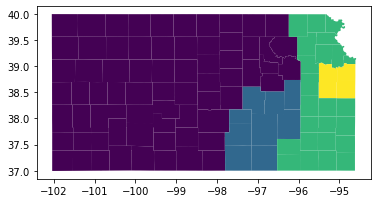

In [17]:
# Which district is each county assigned to?
assignment = [ -1 for u in G.nodes ]
    
# for each district j
for j in range(len(districts)):
    
    # for each node i in this district
    for i in districts[j]:
        
        # What is its GEOID?
        geoID = G.nodes[i]["GEOID10"]
        
        # Need to find this GEOID in the dataframe
        for u in G.nodes:
            if geoID == df['GEOID10'][u]: # Found it
                assignment[u] = j # Node u from the dataframe should be assigned to district j

# Now add the assignments to a column of the dataframe and map it
df['assignment'] = assignment
my_fig = df.plot(column='assignment').get_figure()